Let us start by importing the nessary packages and reading the data. We use the os.path.join to specify the path for the csv file becuase path is system dependent (different for Linux, Mac and Windows).

In [155]:
import os
import numpy as np
import pandas as pd
if not os.getcwd().endswith('assignment2'):
    os.chdir(os.path.join('Unit2', 'assignment2'))
FluTrain = pd.read_csv('FluTrain.csv')

In [156]:
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

We read the Flue traning data into a pandas dataFrame object named FlueTrain.  Let's explore the data a bit, by looking at the first five lines:

In [157]:
FluTrain.head(n=5)

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


We are required to find the week of highest percentage of ILI-related physician visits.

In [102]:
max_visit_index = FluTrain['ILI'].idxmax()
print('Maximum visit value: {}'.format(FluTrain['ILI'][max_visit_index]))
print('Maximum visit week: {}'.format(FluTrain['Week'][max_visit_index]))

Maximum visit value: 7.618892134
Maximum visit week: 2009-10-18 - 2009-10-24


In [103]:
max_query_index = FluTrain['Queries'].idxmax()
print('Maximum query value: {}'.format(FluTrain['Queries'][max_query_index]))
print('Maximum query week: {}'.format(FluTrain['Week'][max_query_index]))

Maximum query value: 1.0
Maximum query week: 2009-10-18 - 2009-10-24


Obiously, both maximum doctor visits and maximum flue retated queries occur on the same week. 


We are required to "Plot the histogram of the dependent variable, ILI. What best describes the distribution of values of ILI?"

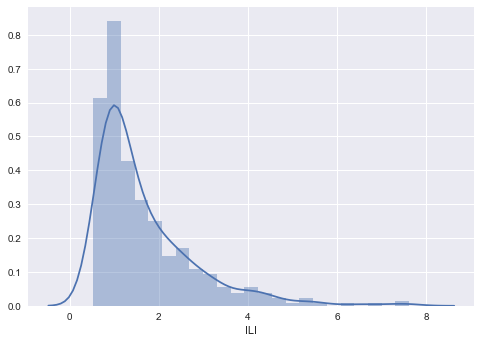

In [108]:
sns.distplot(FluTrain['ILI'])

the distribution of the ILI variable is right skewed.

We are required to "Plot the natural logarithm of ILI versus Queries. What does the plot suggest?"

using numpy's log funtion

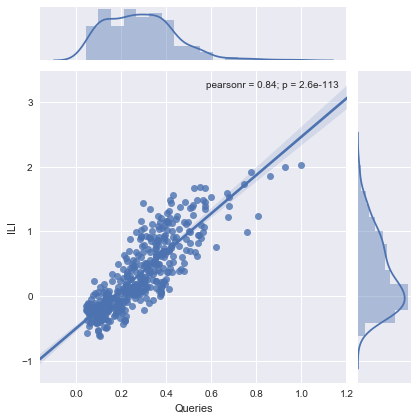

In [116]:
sns.jointplot(x=FluTrain['Queries'], y=np.log(FluTrain['ILI']), kind="reg")

There seem to be a linear relationship.

Which (linear regression) model best describes our estimation problem?

Since Log(ILI) is the dependent variable, we can simply write:
$$Log(ILI) = a + b*Queries$$ 
since Queries is alway positive and the regression line is ascending, the b coefficient is also positive.

What is $R^2$ for the regression model above?

In [117]:
from sklearn.linear_model import LinearRegression as rgre
queries = FluTrain['Queries'].values.reshape(-1, 1)
flu_trend1 = rgre().fit(queries, y=np.log(FluTrain['ILI']))
R_squared = flu_trend1.score(queries, y=np.log(FluTrain['ILI']))
print('The R squared value is: {: 0.3f}'.format(R_squared))

The R squared value is:  0.709


For a single variable linear regression model, what is the relation between $R^2$ and the correlation of the independent and the dependent variables?

In [118]:
from scipy.stats import pearsonr
correlation = pearsonr(FluTrain['Queries'].values, np.log(FluTrain['ILI'].values))[0]

The relation is:

In [119]:
R_squared/correlation**2

1.0000000000000002

which means that $R^2 \simeq \rho^2$

Using this model, what is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012?

Let's read the file and extract the relevant data and reshape it to work with scikit-learn

In [146]:
flu_test = pd.read_csv('FluTest.csv')
queries_test = flu_test['Queries'].values.reshape(-1, 1)
ili_test = flu_test['ILI'].values.reshape(-1, 1)

Altough we were not required to do so, it's interesting to look at the $R^2$ value for the test set: 

In [147]:
flu_trend1.score(queries_test, y=np.log(ili_test))

0.21216057874777527

which is not very good. Now, let us search predict the values and attach them to the test dataframe

In [148]:
test_ili_predict = np.exp(flu_trend1.predict(queries_test))
flu_test['ILI_predict'] = test_ili_predict

Find the index for the the week which begins at 2012-03-11

In [149]:
week_index = flue_test['Week'].str.contains('2012-03-11')
flue_test.loc[week_index]

,Week,ILI,Queries,ILI_predict
10,2012-03-11 - 2012-03-17,2.293422,0.432935,2.187378


The predicted ILI value for the week of 2012-03-11 is:

In [150]:
flue_test.loc[week_index]['ILI_predict'].values[0]

2.1873777211145464

### Problem 3.2
What is the relative error betweeen the estimate and the observed value for the week of March 11, 2012?

In [151]:
pred_val = flue_test.loc[week_index]['ILI_predict'].values[0]
obsr_val = flue_test.loc[week_index]['ILI'].values[0]
(obsr_val - pred_val) / obsr_val

0.046238266364745442

### Problem 3.3
What is the Root Mean Square Error (RMSE) between the estimates and the observations?

In [154]:
np.sqrt(np.mean((flue_test['ILI_predict'].values - flue_test['ILI'].values)**2))

0.7490645271019668